In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

#plt.style.use('default')
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

plt.style.use('seaborn-whitegrid')

/home/koen/anaconda3/envs/bunnies/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
# Create function to group the same species together
def filterSpecies(inputString,test=False):
    
    # make input lower case
    checkString = inputString.lower()
    
    # list of most likely shark species
    sharklist = ['white shark','bull shark','hammerhead shark','tiger shark',\
                 'wobbegong shark','sevengill shark','nurse shark','mako shark',\
                 'blue shark','zambezi shark','whaler shark','blacktip shark',\
                 'bonita shark','reef shark', 'lemon shark', 'angel shark',\
                 'dogfish shark','spinner shark','goblin shark','whale shark',\
                 'silky shark','zambesi shark','raggedtooth shark']
    
    species = ''
    for shark in sharklist:
        if shark in checkString:
            species = shark
            break
            
    if(species == ''):
        species = 'Unspecified'
            
    if(test):
        print species
        
    return species

# Create function to group the same activities together
def groupActivity(inputString,test=False):
    
    # make input lower case
    checkString = inputString.lower()
    
    # list of most likely shark species
    activityList = ['surfing','swimming','diving','fishing','boarding','wading','standing','snorkeling',\
                    'skiing','canoeing','kayaking','floating','walking','bathing','sitting','rowing',\
                    'watching','paddling','playing','treading','dangling']
    
    activity = ''
    for act in activityList:
        if act in checkString:
            activity = act
            break
            
    if(activity == ''):
        #print "'"+checkString+"'"
        activity = 'other'
            
    #if(test):
    #    print activity
        
    return activity

In [3]:
# Create a pandas Series for the yearly overview of a particular item in the column
def createYearOverviewItem(df,columnName,item):
    
    item_record = df.groupby([columnName]).get_group(item)
    year_groupby = item_record.groupby(['Year'])
    year_totals = year_groupby.size()

    return year_totals

# Create a DataFrame with the yearly overview of all the unique items in a particular column
def createYearlyOverview(df,columnName):
    
    #list of all unique items in the column
    columnList = df[columnName].unique()
    
    #Ouput frame
    yearlyOverviewFrame = pd.DataFrame()
    
    # For each item create the yearly overview and add these to the Overview frame
    for item in columnList:
        pandasSeries = createYearOverviewItem(df,columnName,item)
        yearlyOverviewFrame[item] = pandasSeries
    
    return yearlyOverviewFrame

# Make an overview of percentages
def createYearlyOverviewPercentages(dfYearOverviewIn):

    dfYearOverview = dfYearOverviewIn.copy()
    
    # Adding a total to the year overview DataFrame
    dfYearOverview['Total'] = dfYearOverview.sum(axis=1)
    
    # Normalizing
    for colm in dfYearOverview.columns.values:
        dfYearOverview[colm] = dfYearOverview[colm]/dfYearOverview['Total']

    dfYearOverview = dfYearOverview.drop(['Total'],axis=1)
    
    return dfYearOverview
    

In [4]:
# Plot functions
def createPieChart(percent_series,title):
    
    percent_series.name = ''
    #lenIndex = len(percent_series.index)
    #tup1 = (0.1,)
    #tup2 = (0.0,)*(lenIndex-1)
    #explode = tup1 + tup2
    
    #percent_series.plot.pie(subplots=True,figsize=(5, 5),autopct='%1.1f%%',shadow=True,\
    #                     startangle=90,explode=explode,fontsize=12,title=title)
    percent_series.plot.pie(subplots=True,figsize=(5, 5),autopct='%1.1f%%',shadow=True,\
                         startangle=90,fontsize=12,title=title)

In [5]:
# Loading the raw shark data set
shark_df_raw = pd.read_excel('data/GSAF5.xls')

In [6]:
# Filtering and cleaning of the data
shark_df_nanfilt = shark_df_raw.notnull()

# Date filter and selecting the years 1950 - 2016
shark_df_datefilt = shark_df_raw[shark_df_nanfilt['Date'] == True]
print "\nLength data set after date filtering: {}".format(len(shark_df_datefilt))
shark_df_yearfilt = shark_df_datefilt[(shark_df_datefilt['Year'] > 1949) & (shark_df_datefilt['Year'] < 2017)]
print "\nLength data set after 1950-2016 selection: {}".format(len(shark_df_yearfilt))

# Removing the NaN fields from 'Type' column
shark_df_typefilt = shark_df_yearfilt.notnull()
shark_df_types = shark_df_yearfilt[shark_df_typefilt['Type'] == True]
print "\nLength data set after NaN filtering of the 'Type' column: {}".format(len(shark_df_types))

# Taking a look at the attacks which are questionable (Invalid)
invalid_type_df = shark_df_types[shark_df_types['Type'] == 'Invalid']
print "\nTotal 'Invalid' (questionable) types of atacks: {}".format(len(invalid_type_df))

# Removing the Invalid attacks and use the new DataFrame for analysis
shark_df = shark_df_types[shark_df_types['Type'] != 'Invalid']
print "\nTotal entries we're going to work with: {}".format(len(shark_df))


Length data set after date filtering: 6035

Length data set after 1950-2016 selection: 4301

Length data set after NaN filtering of the 'Type' column: 4300

Total 'Invalid' (questionable) types of atacks: 357

Total entries we're going to work with: 3943


# Checking the species and getting the total

/home/koen/anaconda3/envs/bunnies/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/koen/anaconda3/envs/bunnies/lib/python2.7/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


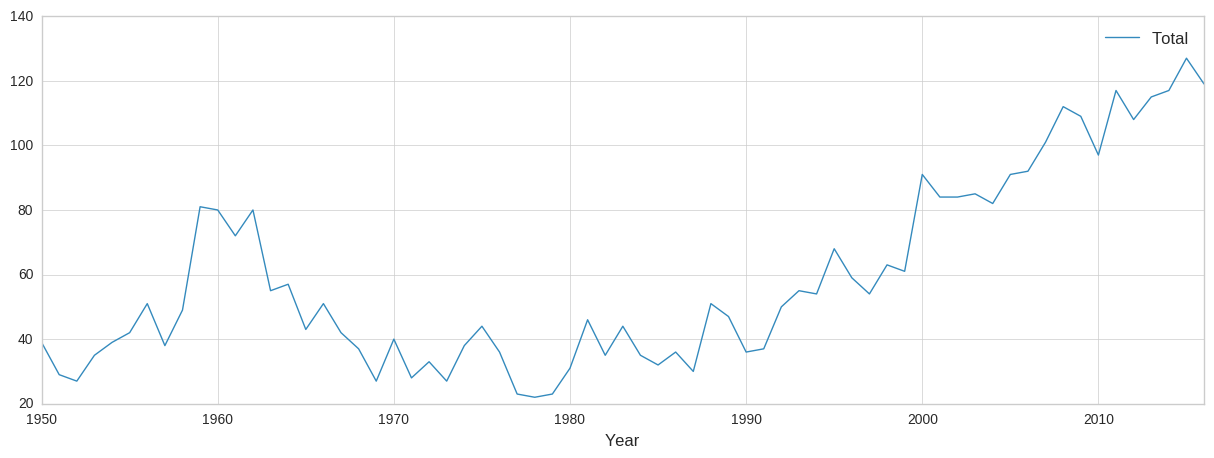

In [7]:
# Adding a column where the species are cleaned and grouped together
# First replacing NaNs in 'Species ' column
shark_df.loc[:,'Species '] = shark_df.loc[:,'Species '].fillna('Unspecified')
shark_df.loc[:,'Species filtered'] = shark_df.loc[:,'Species '].apply(filterSpecies)

# Copy the 'Year' and 'Species filtered' columns to a new data frame
yearlySpecies_df = shark_df[['Year','Species filtered']].copy()

# Create a pandas series with the yearly overview of all species
yearlyOveviewSpecies = createYearlyOverview(yearlySpecies_df,'Species filtered')
total = pd.DataFrame()
total['Total'] = yearlyOveviewSpecies.sum(axis=1)
total.plot()

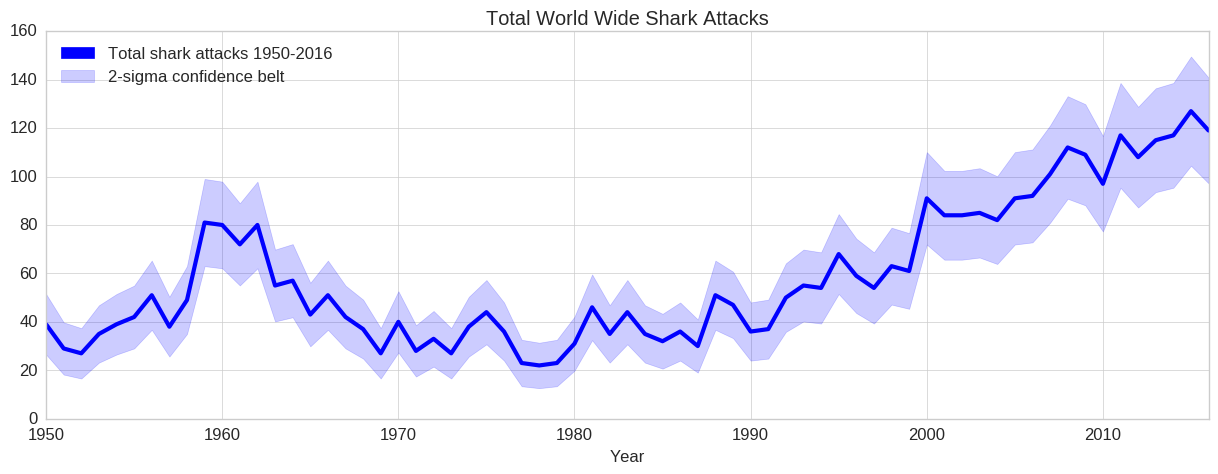

In [8]:
# Creating the confidence limits, assuming a poisson distribution for each measurement
total['err'] = total['Total'].apply(lambda x: np.sqrt(x))
total['ptwosig'] = total['Total']+2*total['err']
total['mtwosig'] = total['Total']-2*total['err']

# Plotting the total shark attacks per year with a nice style and confidence belts
plt.figure()
total['Total'].plot(linewidth=3,color='blue',title='Total World Wide Shark Attacks',fontsize=12)
#plt.plot(total.index,total.Total,linewidth=3)
plt.fill_between(total.index, total['mtwosig'], total['ptwosig'], color='b', alpha=0.2)
blueleg  = mpatches.Patch(color='blue', label='Total shark attacks 1950-2016')
confbelt = mpatches.Patch(color='blue', alpha=0.2, label='2-sigma confidence belt')
plt.legend(handles=[blueleg,confbelt],loc=2)

plt.show()

# Checking the types

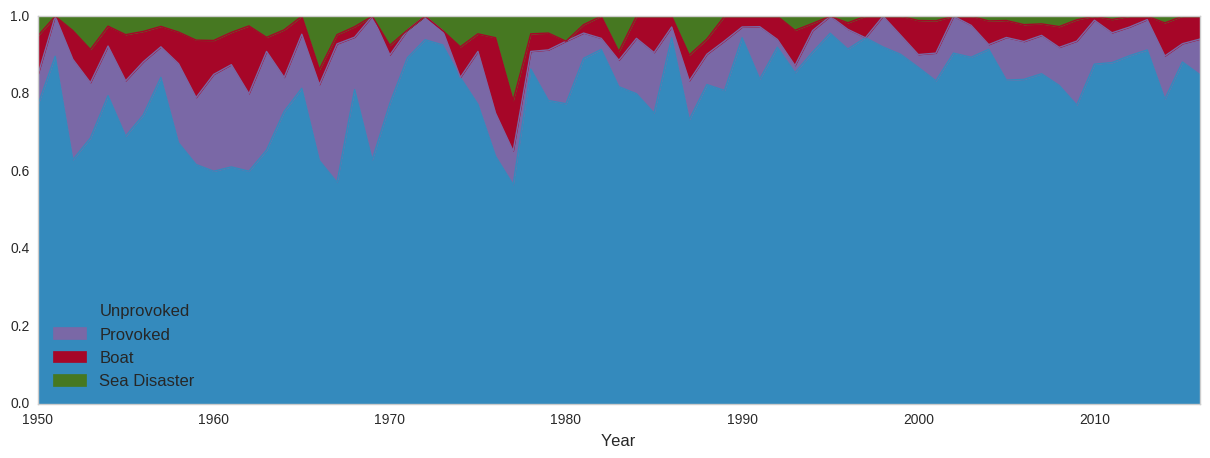

In [9]:
# Creating a yearly overview dataframe with the type of attacks
yearlyOverviewTypes = createYearlyOverview(shark_df,'Type')

# Filling NaN with zeros
for colm in yearlyOverviewTypes.columns.values:
    yearlyOverviewTypes.loc[:,colm] = yearlyOverviewTypes.loc[:,colm].fillna(0.0)

# Removing the redundant column 'Boating'
yearlyOverviewTypes['Boat'] = yearlyOverviewTypes['Boat']+yearlyOverviewTypes['Boating']
yearlyOverviewTypes = yearlyOverviewTypes.drop(['Boating'],axis=1)

percentagesTypes = createYearlyOverviewPercentages(yearlyOverviewTypes)

# Plotting the percentages for each type per year
plt.figure()
percentagesTypes.plot.area()


# Checking the Activity

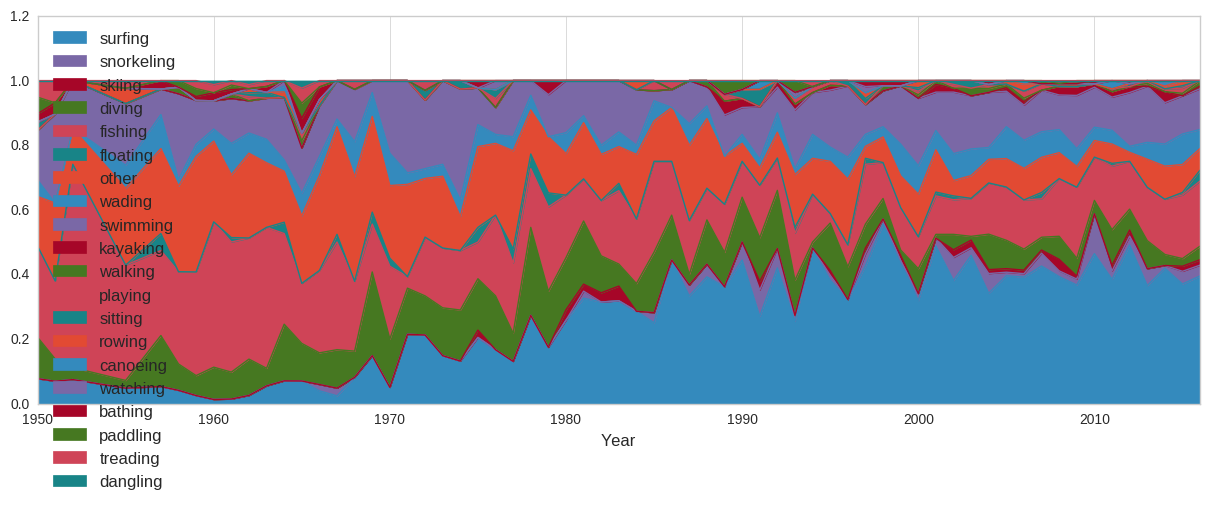

In [10]:
# Replacing NaN in the 'Activity' columns by empty strings
shark_df.loc[:,'Activity'] = shark_df.loc[:,'Activity'].fillna('')
shark_df.loc[:,'Activity grouped'] = shark_df.loc[:,'Activity'].apply(groupActivity)

# Creating a yearly overview dataframe with the type of attacks
yearlyOverviewActiv = createYearlyOverview(shark_df,'Activity grouped')

# Filling NaN with zeros
for colm in yearlyOverviewActiv.columns.values:
    yearlyOverviewActiv.loc[:,colm] = yearlyOverviewActiv.loc[:,colm].fillna(0.0)
    
# Removing the redundant column 'boarding' and 'standing'
yearlyOverviewActiv['surfing'] = yearlyOverviewActiv['surfing']+yearlyOverviewActiv['boarding']
yearlyOverviewActiv = yearlyOverviewActiv.drop(['boarding'],axis=1)
yearlyOverviewActiv['wading'] = yearlyOverviewActiv['wading']+yearlyOverviewActiv['standing']
yearlyOverviewActiv = yearlyOverviewActiv.drop(['standing'],axis=1)

percentagesActiv = createYearlyOverviewPercentages(yearlyOverviewActiv)

# Plotting the percentages for each type per year
plt.figure()
percentagesActiv.plot.area()

In [11]:
# Doing a check
Activ8016 = percentagesActiv[percentagesActiv.index > 1980]
AllActivAverage = Activ8016.mean()
print AllActivAverage

surfing       0.385388
snorkeling    0.028283
skiing        0.010466
diving        0.084241
fishing       0.150875
floating      0.004252
other         0.109451
wading        0.052679
swimming      0.135449
kayaking      0.008989
walking       0.004148
playing       0.006169
sitting       0.005024
rowing        0.004005
canoeing      0.002002
watching      0.001257
bathing       0.002293
paddling      0.003494
treading      0.001534
dangling      0.000000
dtype: float64


In [12]:
def checkTopActivities(inputString):
    
    activity = inputString
    if activity not in ['surfing','swimming','fishing','diving','wading','boarding','standing']:
        activity = 'other'
        
    return activity

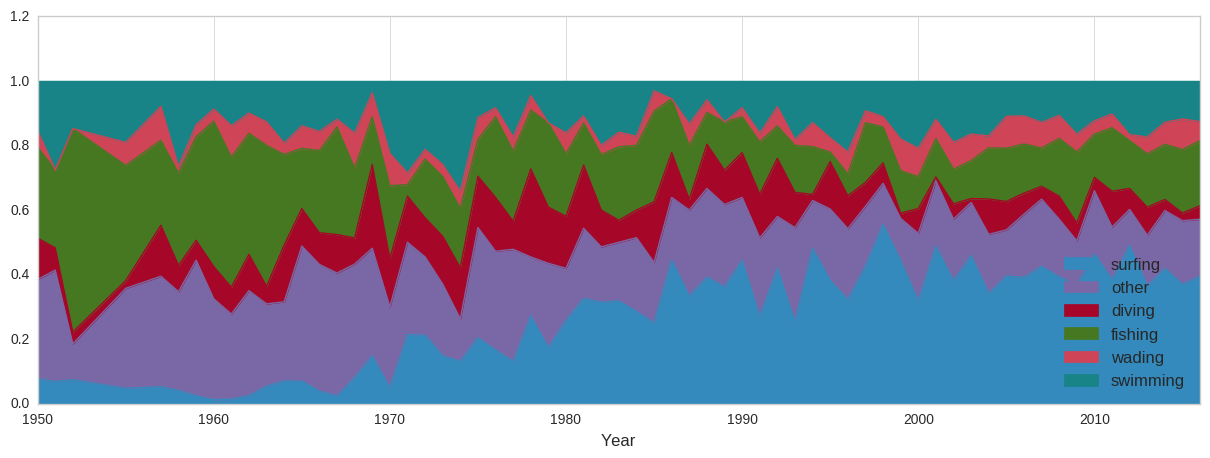

In [13]:
# Grouping the main activities
shark_df.loc[:,'Activity top'] = shark_df.loc[:,'Activity grouped'].apply(checkTopActivities)

# Creating a yearly overview dataframe with the type of attacks
yearlyOverviewActivTop = createYearlyOverview(shark_df,'Activity top')

# Filling NaN with zeros
for colm in yearlyOverviewActivTop.columns.values:
    yearlyOverviewActivTop.loc[:,colm] = yearlyOverviewActivTop.loc[:,colm].fillna(0.0)
    
# Removing the redundant column 'boarding' and 'standing'
yearlyOverviewActivTop['surfing'] = yearlyOverviewActivTop['surfing']+yearlyOverviewActivTop['boarding']
yearlyOverviewActivTop = yearlyOverviewActivTop.drop(['boarding'],axis=1)
yearlyOverviewActivTop['wading'] = yearlyOverviewActivTop['wading']+yearlyOverviewActivTop['standing']
yearlyOverviewActivTop = yearlyOverviewActivTop.drop(['standing'],axis=1)

percentagesActivTop = createYearlyOverviewPercentages(yearlyOverviewActivTop)

# Plotting the percentages for each type per year
plt.figure()
percentagesActivTop.plot.area()

surfing     0.385388
other       0.191368
diving      0.084241
fishing     0.150875
wading      0.052679
swimming    0.135449
dtype: float64


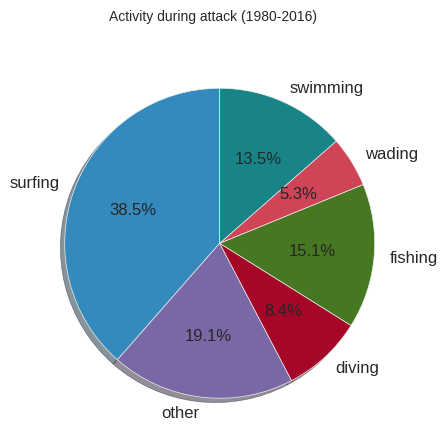

In [14]:
# Creating a pie chart for 1980-2016
ActivTop8016 = percentagesActivTop[percentagesActivTop.index > 1980]
ActivTopAverage = ActivTop8016.mean()
print ActivTopAverage
createPieChart(ActivTopAverage,'Activity during attack (1980-2016)')

# Checking the Countries

In [15]:
shark_df['Country'].value_counts()[:10]

USA                 1646
AUSTRALIA            691
SOUTH AFRICA         409
PAPUA NEW GUINEA     109
BRAZIL                88
BAHAMAS               78
NEW ZEALAND           72
REUNION               53
MEXICO                52
NEW CALEDONIA         45
Name: Country, dtype: int64

In [16]:
def selectTopCountries(inputString):
    
    # These turned out to be the top-4 countries in the period of 1980-2016
    country = inputString
    if country not in ['USA','AUSTRALIA','SOUTH AFRICA','BRAZIL']:
        country = 'OTHER'
        
    return country

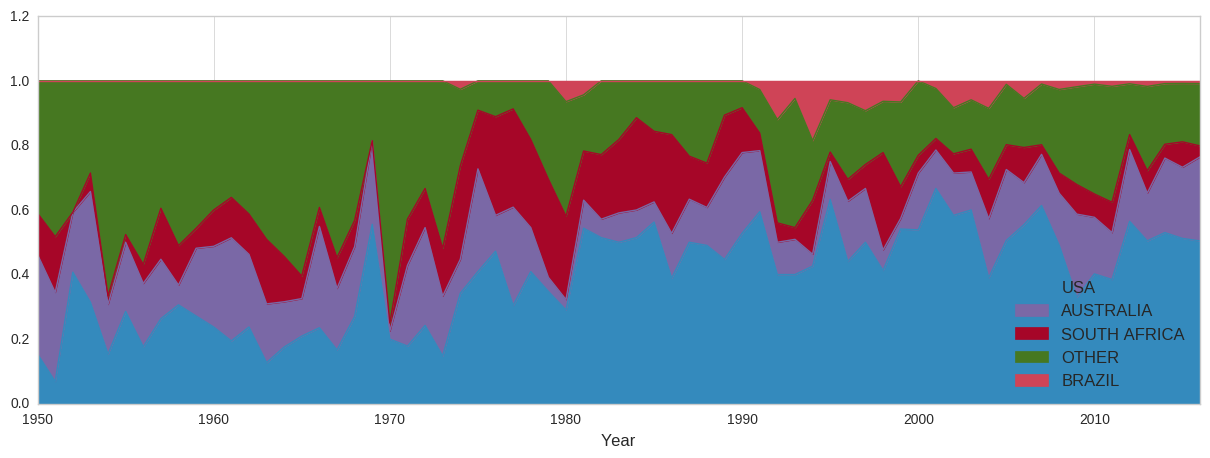

In [17]:
# Replacing NaN in the 'Activity' columns by empty strings
shark_df.loc[:,'Country'] = shark_df.loc[:,'Country'].fillna('')
shark_df.loc[:,'Country top'] = shark_df.loc[:,'Country'].apply(selectTopCountries)

# Creating a yearly overview dataframe with the type of attacks
yearlyOverviewCountry = createYearlyOverview(shark_df,'Country top')

# Filling NaN with zeros
for colm in yearlyOverviewCountry.columns.values:
    yearlyOverviewCountry.loc[:,colm] = yearlyOverviewCountry.loc[:,colm].fillna(0.0)

percentagesCountry = createYearlyOverviewPercentages(yearlyOverviewCountry)

# Plotting the percentages for each type per year
plt.figure()
percentagesCountry.plot.area()

USA             0.500305
AUSTRALIA       0.148215
SOUTH AFRICA    0.111894
OTHER           0.205445
BRAZIL          0.034142
dtype: float64


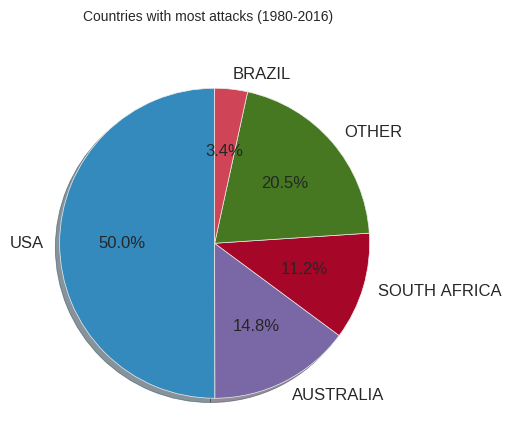

In [18]:
# Creating a pie chart for 1980-2016
Country8016 = percentagesCountry[percentagesCountry.index > 1980]
CountryAverage = Country8016.mean()

print CountryAverage
#CountryAverage.plot.pie(subplots=True,figsize=(5, 5))
createPieChart(CountryAverage,'Countries with most attacks (1980-2016)')

## Checks

In [35]:
shark_df

Case Number                  Date    Year          Type        Country  \
13      2016.12.27           27-Dec-2016  2016.0    Unprovoked            USA   
14      2016.12.24           24-Dec-2016  2016.0    Unprovoked      AUSTRALIA   
15      2016.12.19           19-Dec-2016  2016.0    Unprovoked   SOUTH AFRICA   
16      2016.12.14           14-Dec-2016  2016.0    Unprovoked      AUSTRALIA   
18      2016.12.10           10-Dec-2016  2016.0    Unprovoked        England   
19      2016.12.06           06-Dec-2016  2016.0      Provoked      AUSTRALIA   
20      2016.12.01           01-Dec-2016  2016.0    Unprovoked      AUSTRALIA   
21      2016.11.28           28-Nov-2016  2016.0      Provoked      AUSTRALIA   
22      2016.11.14           14-Nov-2016  2016.0    Unprovoked            USA   
23      2016.10.30           30-Oct-2016  2016.0    Unprovoked            USA   
24      2016.10.29           29-Oct-2016  2016.0    Unprovoked            USA   
25      2016.10.24           24-Oct-2016  2016.0    Unprovoked      AUSTRALIA   
26      2016.10.21           21-Oct-2016  2016.0    Unprovoked            USA   
27      2016.10.15           15-Oct-2016  2016.0    Unprovoked      AUSTRALIA   
28      2016.10.14           14-Oct-2016  2016.0    Unprovoked            USA   
30      2016.10.12           12-Oct-2016  2016.0    Unprovoked      AUSTRALIA   
31      2016.10.10           10-Oct-2016  2016.0    Unprovoked            USA   
32      2016.10.02           02-Oct-2016  2016.0    Unprovoked            USA   
33      2016.10.01           01-Oct-2016  2016.0    Unprovoked            USA   
34      2016.09.26           26-Sep-2016  2016.0    Unprovoked      AUSTRALIA   
35    2016.09.18.c           18-Sep-2016  2016.0    Unprovoked            USA   
36    2016.09.18.b           18-Sep-2016  2016.0    Unprovoked            USA   
37    2016.09.18.a           18-Sep-2016  2016.0    Unprovoked            USA   
38    2016.09.17.b           17-Sep-2016  2016.0    Unprovoked            USA   
39    2016.09.17.a           17-Sep-2016  2016.0    Unprovoked      AUSTRALIA   
40      2016.09.15           16-Sep-2016  2016.0    Unprovoked      AUSTRALIA   
41    2016.09.15.R           15-Sep-2016  2016.0          Boat      AUSTRALIA   
42      2016.09.11           11-Sep-2016  2016.0    Unprovoked            USA   
43      2016.09.07           07-Sep-2016  2016.0    Unprovoked            USA   
44      2016.09.06           06-Sep-2016  2016.0    Unprovoked  NEW CALEDONIA   
...            ...                   ...     ...           ...            ...   
4280    1950.08.00              Aug-1950  1950.0    Unprovoked   SAUDI ARABIA   
4281  1950.07.27.R  Reported 27-Jul-1950  1950.0       Boating      AUSTRALIA   
4282    1950.07.21           21-Jul-1950  1950.0    Unprovoked          JAPAN   
4283    1950.07.19            1950.07.19  1950.0      Provoked          ITALY   
4284    1950.07.14           15-Jul-1950  1950.0    Unprovoked           CUBA   
4285    1950.07.10           10-Jul-1950  1950.0    Unprovoked            USA   
4287    1950.07.00              Jul-1950  1950.0    Unprovoked            USA   
4288    1950.06.25           25-Jun-1950  1950.0    Unprovoked            USA   
4289    1950.06.06           06-Jun-1950  1950.0  Sea Disaster            USA   
4290    1950.05.24           24-May-1950  1950.0    Unprovoked   SOUTH AFRICA   
4291    1950.05.01           01-May-1950  1950.0       Boating          ITALY   
4292  1950.04.09.b           09-Apr-1950  1950.0  Sea Disaster      AUSTRALIA   
4293  1950.04.09.a           09-Apr-1950  1950.0    Unprovoked   SOUTH AFRICA   
4294    1950.03.26           26-Mar-1950  1950.0    Unprovoked   SOUTH AFRICA   
4295    1950.03.08           08-Mar-1950  1950.0    Unprovoked   SOUTH AFRICA   
4297  1950.02.18.R  Reported 18-Feb-1950  1950.0    Unprovoked      AUSTRALIA   
4298    1950.02.11           11-Feb-1950  1950.0    Unprovoked   SOUTH AFRICA   
4300  1950.01.12.R  Reported 12-Jan-19

In [77]:
def Check(column,item):
    ItemYearly_df = shark_df[['Year',column]].copy()
    yearlyOveviewItem = createYearOverviewItem(ItemYearly_df,column,item)
    yearlyOveviewItem.plot()
    
def Check2(column,stop):
    ItemYearly_df = shark_df[['Year',column]].copy()
    items = ItemYearly_df[column].unique()
    for i, item in enumerate(items):
        print item
        yearlyOveviewItem = createYearOverviewItem(ItemYearly_df,column,item)
        yearlyOveviewItem.plot()
        if (i == stop):
            break

In [107]:

#Check2('Activity',10)